<a href="https://colab.research.google.com/github/dnlgnwn-wq/IRIS/blob/main/ASTRI-UAS-ML-Prak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [41]:
# ==============================
# IMPORT LIBRARY
# ==============================
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # (INI CONTOH MODEL RANDOM FOREST BISA GANTI MODEL LAIN)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Digunakan untuk pengolahan data, visualisasi, dan pemodelan machine learning

# **MELIHAT DATA**

In [42]:
file_path = "/content/iris.csv"
data = pd.read_csv(file_path)

print("=== DATASET IRIS ===")
display(data.head())

# Tahap ini digunakan untuk menampilkan beberapa baris awal dataset guna memahami struktur data, nama kolom, dan isi awal dataset.

=== DATASET IRIS ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **MELIHAT SELURUH DATA (DIPISAHKAN SESUAI ISI LABEL)**

In [43]:
# Pisahkan per spesies
setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']

# Urutkan dari ukuran terkecil ke terbesar (berdasarkan sepal_length)
setosa_sorted = setosa.sort_values(by='sepal_length', ascending=True)
versicolor_sorted = versicolor.sort_values(by='sepal_length', ascending=True)
virginica_sorted = virginica.sort_values(by='sepal_length', ascending=True)

# Tampilkan jumlah data
print("Jumlah data per spesies:")
print("Setosa     :", len(setosa_sorted))
print("Versicolor :", len(versicolor_sorted))
print("Virginica  :", len(virginica_sorted))

# Tampilkan tabel
print("\n=== IRIS SETOSA (Urut Sepal Length Terkecil → Terbesar) ===")
display(setosa_sorted)

print("\n=== IRIS VERSICOLOR (Urut Sepal Length Terkecil → Terbesar) ===")
display(versicolor_sorted)

print("\n=== IRIS VIRGINICA (Urut Sepal Length Terkecil → Terbesar) ===")
display(virginica_sorted)

# Data dipisahkan berdasarkan label species untuk melihat distribusi dan jumlah data pada setiap kelas.
# Pengurutan dilakukan untuk mempermudah analisis karakteristik data.

Jumlah data per spesies:
Setosa     : 50
Versicolor : 50
Virginica  : 50

=== IRIS SETOSA (Urut Sepal Length Terkecil → Terbesar) ===


,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa



=== IRIS VERSICOLOR (Urut Sepal Length Terkecil → Terbesar) ===


,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,versicolor
60,5.0,2.0,3.5,1.0,versicolor
93,5.0,2.3,3.3,1.0,versicolor
98,5.1,2.5,3.0,1.1,versicolor
59,5.2,2.7,3.9,1.4,versicolor
84,5.4,3.0,4.5,1.5,versicolor
80,5.5,2.4,3.8,1.1,versicolor
53,5.5,2.3,4.0,1.3,versicolor
90,5.5,2.6,4.4,1.2,versicolor
81,5.5,2.4,3.7,1.0,versicolor



=== IRIS VIRGINICA (Urut Sepal Length Terkecil → Terbesar) ===


,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,virginica
121,5.6,2.8,4.9,2.0,virginica
113,5.7,2.5,5.0,2.0,virginica
114,5.8,2.8,5.1,2.4,virginica
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica
149,5.9,3.0,5.1,1.8,virginica
119,6.0,2.2,5.0,1.5,virginica
138,6.0,3.0,4.8,1.8,virginica
134,6.1,2.6,5.6,1.4,virginica


# **MEMERIKSA DATA**

In [44]:
# ==============================
# CEK STRUKTUR DATA
# ==============================
data.info()

# Digunakan untuk melihat jumlah baris, jumlah kolom, tipe data, serta mendeteksi kemungkinan adanya missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **CEK MISSING VALUE DATA**

In [45]:
# ==============================
# CEK MISSING VALUE
# ==============================
data.isna().sum()

# Pengecekan dilakukan untuk memastikan tidak terdapat nilai kosong (NaN).

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# **MENANGANI MISSING VALUE (JIKA ADA)**

In [46]:
# ==============================
# HANDLE MISSING VALUE
# ==============================
data = data.dropna()

# Jika ada, data tersebut dihapus agar tidak mengganggu proses training model.

# **MENENTUKAN FITUR DAN LABEL**

In [47]:
# ==============================
# MENENTUKAN X DAN Y
# ==============================
# GANTI 'species' dengan tergantung apa yang dijadikan label
X = data.drop('species', axis=1)
y = data['species']

# Kolom species ditentukan sebagai label (target), sedangkan kolom lainnya digunakan sebagai fitur (variabel input).

# **ENCODING LABEL KATEGORI**

In [48]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Mapping:")
for i, label in enumerate(le.classes_):
    print(i, "=", label)

# Label kategorikal diubah menjadi bentuk numerik agar dapat diproses oleh model machine learning.

Label Mapping:
0 = setosa
1 = versicolor
2 = virginica


# **VISUALISASI DATA**

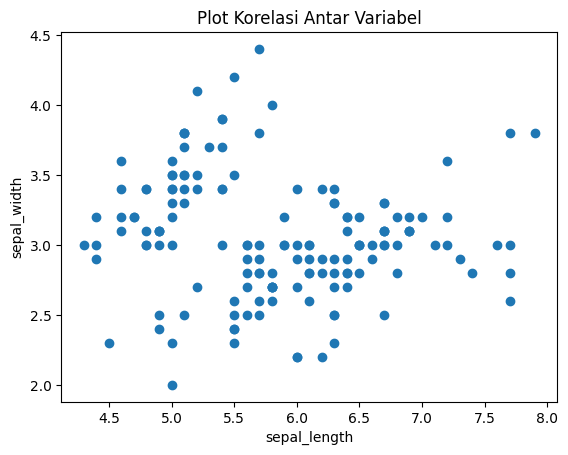

In [49]:
# ==============================
# VISUALISASI DATA
# ==============================

plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Plot Korelasi Antar Variabel')
plt.show()

# Scatter plot digunakan untuk melihat hubungan antara variabel sepal_length dan sepal_width.
# Setiap titik merepresentasikan satu data.
# Visualisasi ini membantu memahami pola sebaran data serta hubungan antar variabel sebelum proses training model dilakukan.

# **SPLIT DATA (TRAIN & TEST)**

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data train:", X_train.shape)
print("Data test :", X_test.shape)

# Data dibagi menjadi data latih dan data uji dengan perbandingan 80:20 untuk mengevaluasi performa model secara objektif.
# Memecah Data

Data train: (120, 4)
Data test : (30, 4)


# **TRAINING**

In [30]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

print("\n=== Training Model ===")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Training selesai dalam {end_time - start_time:.4f} detik")

# contoh menggunkan model random forest bisa diganti dg yang lain


=== Training Model ===
Training selesai dalam 1.8662 detik


# **PREDIKSI & EVALUASI (ACC, PREC, REC, F1)**

In [52]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) # -> ini bagian prediksi

acc = accuracy_score(y_test, y_pred) # -> ini bagian menampilkan accuracy
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print("\n=== HASIL EVALUASI ===")
print(f"Akurasi : {acc * 100:.2f}%")
print(f"AUC     : {auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4)) # -> ini bagian menampilkan precision, recall dan f1 score

# Evaluasi dilakukan menggunakan Accuracy, Precision, Recall, F1-Score, dan AUC untuk menilai performa model secara menyeluruh.


=== HASIL EVALUASI ===
Akurasi : 100.00%
AUC     : 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    1.0000    1.0000         9
   virginica     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30



# **CONFUSION MATRIX**

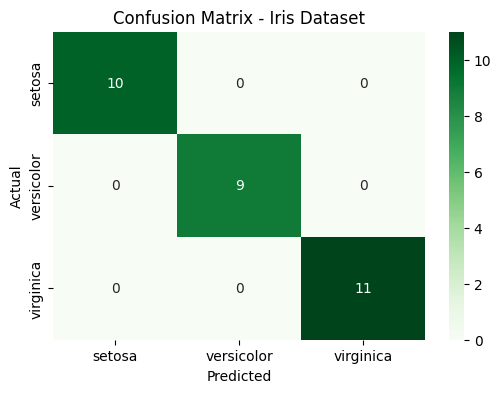

In [53]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Dataset")
plt.show()

# seluruh data uji berhasil diklasifikasikan dengan benar.
# Confusion Matrix menunjukkan hasil klasifikasi model terhadap data uji dan membantu melihat kesalahan prediksi pada setiap kelas.

# **VISUALISASI PERFORMA MODEL**

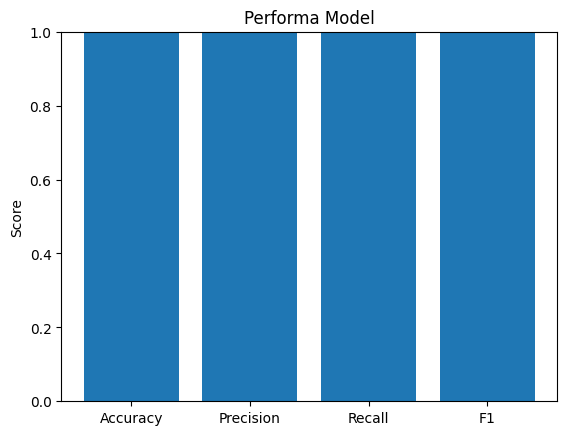

In [54]:
# ==============================
# VISUALISASI HASIL
# ==============================

accuracy = acc # Use the existing 'acc' variable for accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Performa Model')
plt.ylabel('Score')
plt.show()

# Bar chart performa model → Visualisasi Akhir.
# Grafik batang digunakan untuk membandingkan nilai evaluasi model. Nilai yang mendekati 1 menunjukkan performa model yang baik dalam melakukan klasifikasi.

# **PREDIKSI MANUAL DARI USER**

In [39]:
print("\n=== Prediksi Manual Iris ===")
print("=== UKURAN DALAM CENTIMETER (CM) ===")

sepal_length = float(input("Masukkan sepal length: "))
sepal_width  = float(input("Masukkan sepal width : "))
petal_length = float(input("Masukkan petal length: "))
petal_width  = float(input("Masukkan petal width : "))

# Normalisasi input
input_scaled = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Prediksi
pred = model.predict(input_scaled)
pred_label = le.inverse_transform(pred)

print(f"\n Jenis Bunga Iris: {pred_label[0]}")


=== Prediksi Manual Iris ===
=== UKURAN DALAM CENTIMETER (CM) ===
Masukkan sepal length: 3
Masukkan sepal width : 2
Masukkan petal length: 1
Masukkan petal width : 4

 Jenis Bunga Iris: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
